# 📘 1. INTRODUCTION
This case study focuses on applying Exploratory Data Analysis (EDA) in a real-world financial scenario. In this project, we aim to understand how consumer characteristics and loan features influence the risk of loan default.

The goal is to use EDA techniques to uncover patterns in the data that can help minimize risk for lenders, ensuring that loans are granted to applicants who are most likely to repay them, and denied to those who may default.

# 🔍 1.1 BUSINESS UNDERSTANDING
In modern consumer lending, one of the biggest challenges for financial institutions is credit risk assessment — especially for customers with little or no credit history.

We work for a consumer finance company that offers various types of loans to urban customers. Currently, the loan approval process faces two major risks:

Risk 1: If an applicant is actually creditworthy but is rejected, the company loses business.

Risk 2: If a risky applicant is approved and then defaults, the company suffers financial loss.

The data we're analyzing includes:

Client attributes at the time of application

Loan attributes

Loan approval outcomes

Clients fall into two categories:

Clients with payment difficulties (e.g., delayed payments in early instalments)

Clients with no difficulties (i.e., timely repayment)

Loan applications can result in four outcomes:

Approved – Loan granted

Cancelled – Client withdrew the application

Refused – Company rejected the application

Unused Offer – Offer was not utilized by client

By analyzing this data, we aim to:

Identify patterns in applicants who default

Improve the loan approval model

Reduce the company’s exposure to high-risk customers

# 🎯 1.2 BUSINESS OBJECTIVES
The key business objective is to:

Identify the variables (customer and loan features) that strongly indicate a risk of default.

This insight can be used to:

Reject risky applicants

Adjust interest rates for medium-risk applicants

Offer larger loans to highly trustworthy customers

Ultimately, we aim to optimize the risk-return tradeoff in the company's loan portfolio.

# 📂 1.3 DATA UNDERSTANDING
We are using three primary datasets:

File Name	Description
application_data.csv	Information about the client at the time of the loan application.
previous_application.csv	Details about the client's past loan applications and their outcomes.
columns_description.csv	Metadata explaining the columns/features used in the above two datasets.

These datasets include features like:

Demographic info: gender, age, education, employment

Financials: income, credit score, existing loans

Loan info: amount, interest rate, status

# 🧠 1.4 ASSUMPTIONS
We are not allowed to impute missing values or drop records — we can only suggest such cleaning steps.

For any column requiring data type conversion, we can suggest conversions but cannot make the changes directly if nulls are present.

Cosmetic changes like converting negative values to absolute values are acceptable.

Outlier handling should be mentioned, but values should remain unchanged (only flagged or visualized).

# 🗂️ 2. LOAN APPLICATION DATA
# 2.1 Read and Load Data
We start by loading the **bank_loan_dataset.csv** file which contains current loan applications.

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [367]:
plt.style.use('ggplot')

In [368]:
df = pd.read_csv('/content/bank_loan_dataset.csv')

# 2.2 Inspect the data frame

In this section we will perform the below activities -

Inspect the application dataframe to understand the size of this dataset
Look at the column info such as data type
Summarise the numeric columns

In [369]:
df.shape

(2000, 24)

In [370]:
df.columns

Index(['customer_id', 'gender', 'age', 'marital_status', 'education',
       'employment_type', 'dependents', 'annual_income', 'monthly_expense',
       'credit_score', 'existing_loans_count', 'loan_amount',
       'loan_term_months', 'interest_rate', 'loan_purpose', 'credit_history',
       'debt_to_income_ratio', 'loan_to_value_ratio', 'num_of_defaults',
       'last_delinquency', 'loan_status', 'approved_amount',
       'application_date', 'disbursal_date'],
      dtype='object')

In [371]:
df.dtypes

,0
customer_id,object
gender,object
age,float64
marital_status,object
education,object
employment_type,object
dependents,float64
annual_income,float64
monthly_expense,float64
credit_score,float64


In [372]:
df.head()

,customer_id,gender,age,marital_status,education,employment_type,dependents,annual_income,monthly_expense,credit_score,...,loan_purpose,credit_history,debt_to_income_ratio,loan_to_value_ratio,num_of_defaults,last_delinquency,loan_status,approved_amount,application_date,disbursal_date
0,CUST0000,Other,63.0,Single,Not Graduate,Job,3.0,503985.842516,22780.134122,428.0,...,Car,1.0,0.43,0.77,2.0,>2 years,Approved,227940.820400,2022-08-21,2023-09-22
1,CUST0001,Male,53.0,Married,Graduate,Job,2.0,459951.081474,38417.341790,810.0,...,Education,0.0,0.59,0.74,1.0,<1 year,Defaulted,125140.896567,2022-11-26,2025-05-06
2,CUST0002,Other,62.0,Single,Graduate,Self-employed,2.0,491702.816208,25315.146061,722.0,...,Medical,0.0,0.16,0.63,2.0,Never,Rejected,161505.446564,2022-07-16,2023-10-25
3,CUST0003,Other,25.0,Single,NaN,Job,2.0,564059.698441,20322.478715,684.0,...,Business,1.0,0.33,0.62,1.0,Never,Rejected,307254.428145,2022-10-30,2023-12-13
4,CUST0004,Male,46.0,Divorced,Graduate,Business,1.0,574672.876514,50980.331188,531.0,...,Education,0.0,0.19,0.76,0.0,Never,Approved,114169.513427,2023-11-18,2023-10-25


# 2.3 Data Cleaning & Imputation - Suggestions
In this section we will perform data quality check by identifying missing values, incorrect data types etc. and by suggesting the best possible way to treat such data.

Check for any missing values and best possible metric to handle those missing values
Verify whether any column(s) has incorrect data type
For numerical columns, we will check for outliers
We will also perform binning of continuous variables

customer_id             100
gender                  100
age                     100
marital_status          100
education               100
employment_type         100
dependents              100
annual_income            98
monthly_expense         100
credit_score            100
existing_loans_count    100
loan_amount              98
loan_term_months        100
interest_rate           100
loan_purpose            100
credit_history          100
debt_to_income_ratio    100
loan_to_value_ratio     100
num_of_defaults         100
last_delinquency        100
loan_status             100
approved_amount         100
application_date        100
disbursal_date          100
dtype: int64


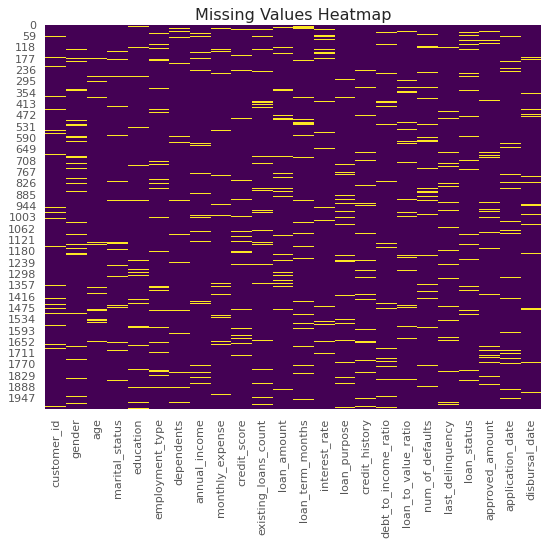

In [373]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


**Fill categorical values**

In [374]:
cat_cols = ['gender', 'marital_status', 'education', 'employment_type',
            'loan_purpose', 'loan_status', 'last_delinquency']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


**Fill Numerical values**

In [375]:
num_cols = ['age', 'annual_income', 'monthly_expense', 'credit_score',
            'existing_loans_count', 'loan_amount', 'loan_term_months',
            'interest_rate', 'approved_amount', 'debt_to_income_ratio',
            'loan_to_value_ratio', 'num_of_defaults']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


**Handle Date Columns**

In [376]:
df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')
df['disbursal_date'] = pd.to_datetime(df['disbursal_date'], errors='coerce')


**Handle Date Columns**

In [377]:
df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')
df['disbursal_date'] = pd.to_datetime(df['disbursal_date'], errors='coerce')


In [378]:
df.dropna(inplace=True)

customer_id             0
gender                  0
age                     0
marital_status          0
education               0
employment_type         0
dependents              0
annual_income           0
monthly_expense         0
credit_score            0
existing_loans_count    0
loan_amount             0
loan_term_months        0
interest_rate           0
loan_purpose            0
credit_history          0
debt_to_income_ratio    0
loan_to_value_ratio     0
num_of_defaults         0
last_delinquency        0
loan_status             0
approved_amount         0
application_date        0
disbursal_date          0
dtype: int64


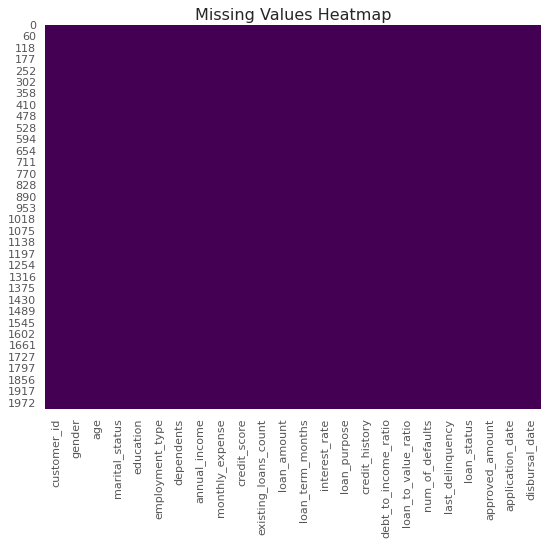

In [379]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [380]:
df.shape

(1542, 24)

**Outlier Analysis -**
As we know, there are possibilities of having exceptionally low or high values in our data termed as outliers. It is of very much importance to identify such data points and get the data treated to avoid wrong interpretation. We are going to consider the below columns for outlier analysis.

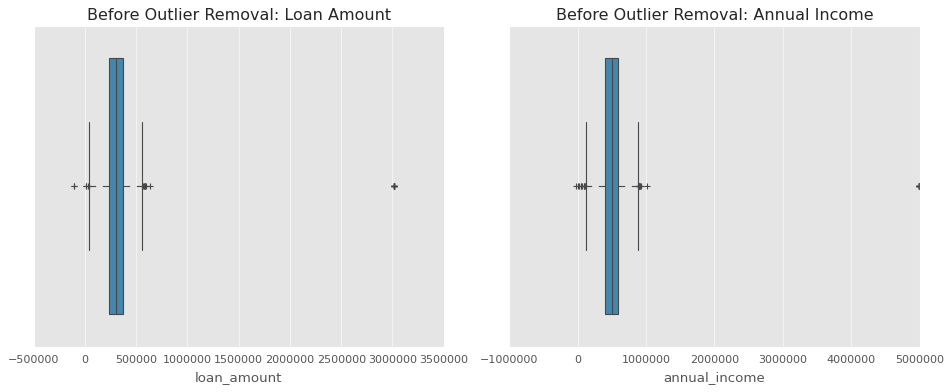

In [381]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title("Before Outlier Removal: Loan Amount")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['annual_income'])
plt.title("Before Outlier Removal: Annual Income")

plt.tight_layout()
plt.show()


In [382]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df = remove_outliers(df, 'loan_amount')
df = remove_outliers(df, 'annual_income')


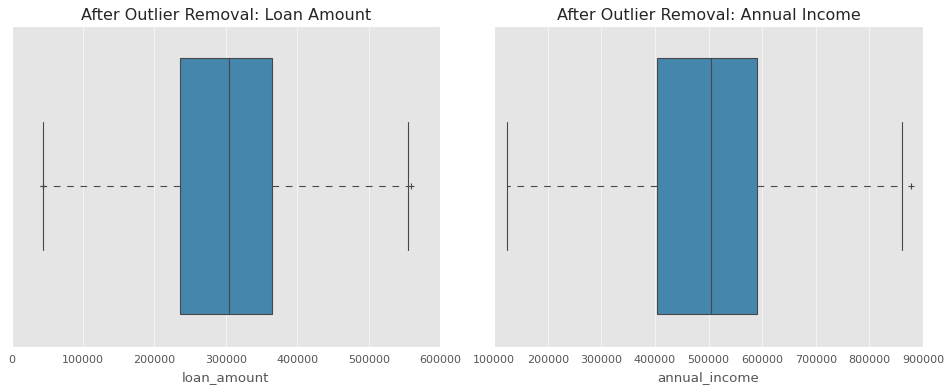

In [383]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title("After Outlier Removal: Loan Amount")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['annual_income'])
plt.title("After Outlier Removal: Annual Income")

plt.tight_layout()
plt.show()


In [384]:
df.describe()

,age,dependents,annual_income,monthly_expense,credit_score,existing_loans_count,loan_amount,loan_term_months,interest_rate,credit_history,debt_to_income_ratio,loan_to_value_ratio,num_of_defaults,approved_amount,application_date,disbursal_date
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480,1480
mean,43.589865,1.464865,497725.455142,29926.414278,570.214865,1.552703,300256.258703,33.154054,10.047297,0.485811,0.350764,0.722453,0.993919,255154.990149,2023-12-30 10:04:12.972973312,2024-06-24 08:17:11.351351296
min,18.000000,0.000000,123482.761652,-4257.953528,300.000000,0.000000,43824.843794,12.000000,5.010000,0.000000,0.100000,0.500000,0.000000,31517.459273,2022-07-02 00:00:00,2023-07-03 00:00:00
25%,31.000000,0.000000,402848.962317,23558.481859,437.000000,1.000000,236187.301590,12.000000,7.767500,0.000000,0.230000,0.620000,0.000000,198213.214084,2023-03-26 18:00:00,2023-12-25 18:00:00
50%,43.500000,1.000000,504577.348863,30002.741805,564.000000,2.000000,305059.916885,36.000000,10.000000,0.000000,0.350000,0.720000,1.000000,253424.294929,2024-01-04 00:00:00,2024-06-24 00:00:00
75%,56.000000,2.000000,589626.274654,36558.059146,700.000000,2.000000,364139.714722,36.000000,12.430000,1.000000,0.460000,0.830000,2.000000,310511.613950,2024-10-07 00:00:00,2024-12-21 06:00:00
max,69.000000,3.000000,876889.122617,62087.686067,849.000000,3.000000,558579.062722,60.000000,15.000000,1.000000,0.600000,0.950000,2.000000,538862.571248,2025-06-30 00:00:00,2025-07-01 00:00:00
std,14.778693,1.123290,138355.631035,9804.275063,153.932701,1.098862,95307.669961,17.611787,2.818941,0.499968,0.139633,0.125249,0.788244,84870.737552,NaN,NaN


# **Exploratory Data Analysis (EDA)**
**Correlation Heatmap**

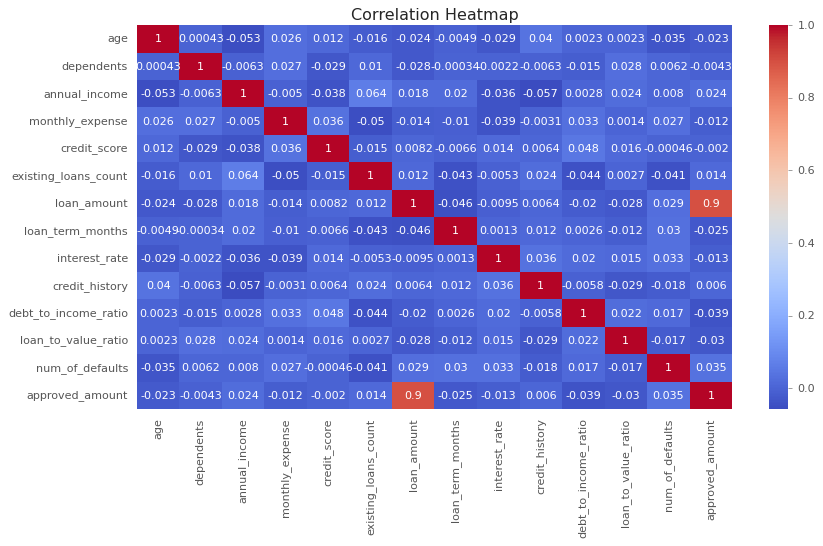

In [385]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


** Loan Status count**

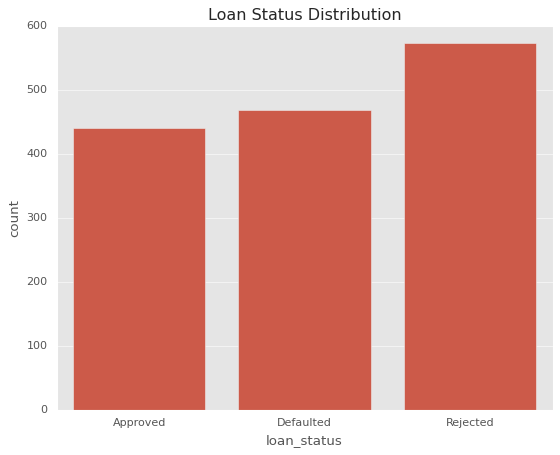

In [386]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()


**Loan Amount vs Income**

In [387]:
px.scatter(df, x='annual_income', y='loan_amount', color='loan_status',
           title="Income vs Loan Amount by Loan Status").show()


**Loan Purpose by Status**

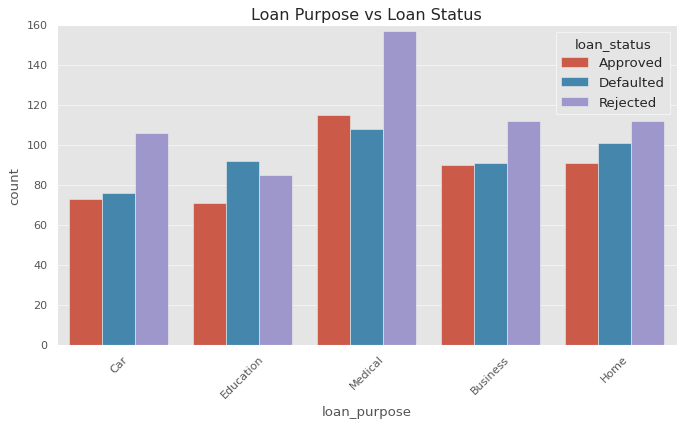

In [388]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='loan_purpose', hue='loan_status')
plt.title("Loan Purpose vs Loan Status")
plt.xticks(rotation=45)
plt.show()


**Employment Type Impact**

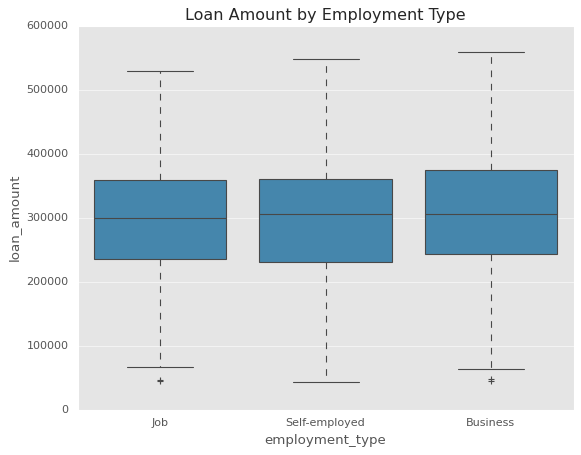

In [389]:
sns.boxplot(data=df, x='employment_type', y='loan_amount')
plt.title("Loan Amount by Employment Type")
plt.show()


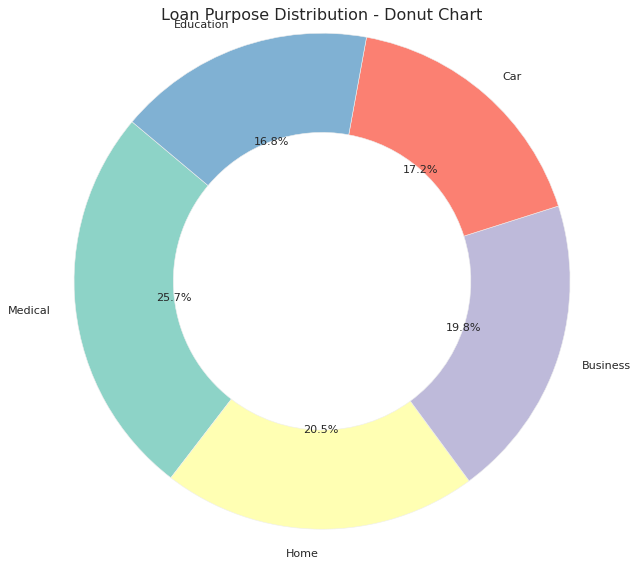

In [390]:
loan_purpose_counts = df['loan_purpose'].value_counts()

plt.figure(figsize=(8, 8))
colors = plt.get_cmap('Set3').colors
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%',
        startangle=140, wedgeprops={'width':0.4}, colors=colors)

plt.title("Loan Purpose Distribution - Donut Chart")
plt.axis('equal')
plt.show()


/tmp/ipython-input-391-4198091205.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




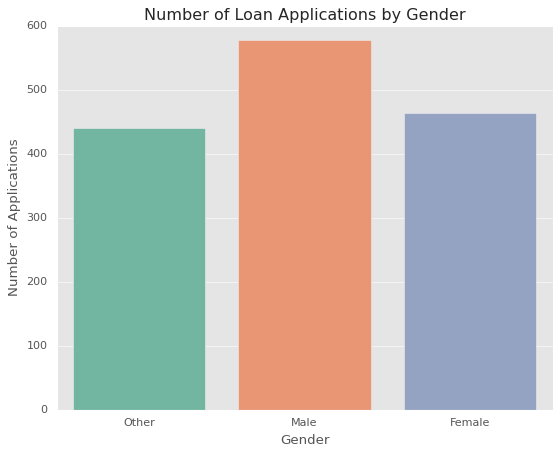

In [391]:
sns.countplot(x='gender', data=df, palette='Set2')
plt.title("Number of Loan Applications by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Applications")
plt.show()


Loan Status by Education **Level**

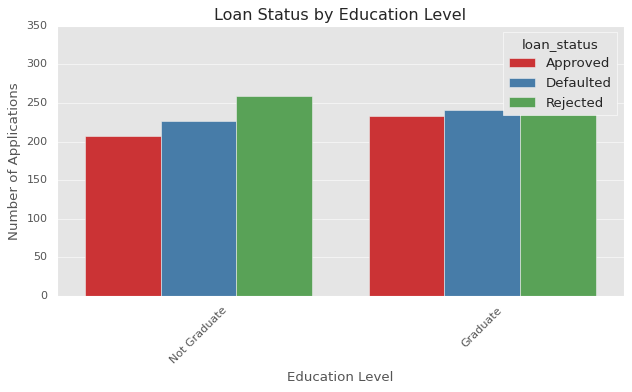

In [392]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='education', hue='loan_status', palette='Set1')
plt.title("Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loan Amount vs Credit Score (Scatter Plot)

In [393]:
fig = px.scatter(df, x='credit_score', y='loan_amount',
                 color='loan_status', title="Loan Amount vs Credit Score",
                 labels={'credit_score': 'Credit Score', 'loan_amount': 'Loan Amount'})
fig.show()


**Default Rate by Employment Type**

In [394]:
default_rate = df[df['loan_status'] == 'Defaulted'].groupby('employment_type').size() / df.groupby('employment_type').size()
default_rate = default_rate.reset_index(name='default_rate')

fig = px.bar(default_rate, x='employment_type', y='default_rate',
             title="Default Rate by Employment Type", text='default_rate',
             color='employment_type')
fig.show()


# Month-Wise Loan Applications Line **Chart**

In [395]:
df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')

df['application_month'] = df['application_date'].dt.month_name()
df['application_month_num'] = df['application_date'].dt.month  # For correct sorting


In [396]:
monthly_counts = df.groupby(['application_month_num', 'application_month']).size().reset_index(name='application_count')
monthly_counts = monthly_counts.sort_values(by='application_month_num')


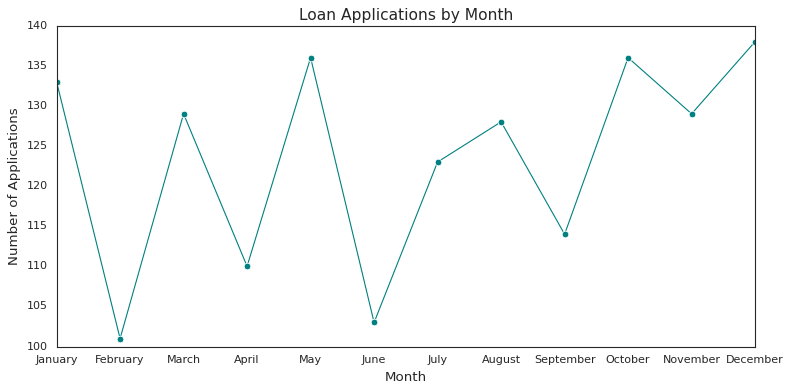

In [398]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_counts, x='application_month', y='application_count', marker='o', color='teal')

plt.title("Loan Applications by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.grid(False)

plt.tight_layout()
plt.show()